# Taller Pandas

02/12/2026

## Actividades de Carga y Almacenamiento de Datos  ** 2 puntos **

In [2]:
# A. Carga el fichero WHO.csv disponible en la carpeta `data', solo las primeras 100 filas y las columnas: 0,1,3,20,30
# y despues muestra solo las primeras 5 filas
import pandas as pd
df = pd.read_csv("C:/Users/User/Desktop/MAD2/ttda/WHO.csv", usecols=[0,1,3,20,30]).loc[:100]
df

,Country,CountryID,Adolescent fertility rate (%),Births attended by skilled health personnel (%),One-year-olds immunized with three doses of diphtheria tetanus toxoid and pertussis (DTP3) (%)
0,Afghanistan,1,151.0,14.0,83.0
1,Albania,2,27.0,100.0,98.0
2,Algeria,3,6.0,95.0,95.0
3,Andorra,4,NaN,NaN,96.0
4,Angola,5,146.0,45.0,83.0
...,...,...,...,...,...
96,Lao People's Democratic Republic,97,110.0,19.0,50.0
97,Latvia,98,16.0,100.0,98.0
98,Lebanon,99,18.0,98.0,74.0
99,Lesotho,100,98.0,55.0,83.0


In [7]:
# B.1 Carga el fichero reserva1.json disponible en la carpeta `data' y muestra el contenido
# TIP: https://pandas.pydata.org/docs/reference/api/pandas.read_json.html
df2 = pd.read_json("C:/Users/User/Desktop/MAD2/ttda/taller_pandas/taller_pandas/data/reserva1.json")
df2

,reserva_id,hotel,check_in,check_out,huesped_principal,habitaciones_reservadas,moneda,estado
0,RES789012,"{'id': 'H456', 'nombre': 'Hotel Costa Azul', '...",2025-10-15,2025-10-18,"{'nombre': 'Ana', 'apellido': 'Gómez', 'email'...","[{'tipo_habitacion': 'Individual Estándar', 'h...",EUR,Confirmada


In [39]:
# B.2 Usando el fichero reserva1.json, ¿Cómo obtendrías un dataframe con las características de la columna 'hotel'(y el resto de json anidados) en columnas propias?
# TIP: https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html

In [35]:
# C. Guarda los siguientes datos en formato CSV, dentro de la carpeta 'data', utiliza ";" como separador y codifica con utf-8

data = [
    {
        "reserva_id": "RES789012",
        "hotel": {"id": "H456", "nombre": "Hotel Costa Azul", "ciudad": "Palma"},
        "check_in": "2025-01-15",
        "check_out": "2025-01-20",
        "huesped_principal": {"nombre": "Juan", "apellido": "López"},
        "habitaciones_reservadas": 2,
        "moneda": "EUR",
        "estado": "confirmada"
    },
        {
        "reserva_id": "RES789014",
        "hotel": {"id": "H456", "nombre": "Hotel Costa Azul", "ciudad": "Palma"},
        "check_in": "2025-01-15",
        "check_out": "2025-01-20",
        "huesped_principal": {"nombre": "Yeha", "apellido": "Noha"},
        "habitaciones_reservadas": 1,
        "moneda": "DOLLAR",
        "estado": "confirmada"
    }
]
dfD = pd.DataFrame(data)
dfD.to_csv(sep=";", encoding="utf-8")

";reserva_id;hotel;check_in;check_out;huesped_principal;habitaciones_reservadas;moneda;estado\r\n0;RES789012;{'id': 'H456', 'nombre': 'Hotel Costa Azul', 'ciudad': 'Palma'};2025-01-15;2025-01-20;{'nombre': 'Juan', 'apellido': 'López'};2;EUR;confirmada\r\n1;RES789014;{'id': 'H456', 'nombre': 'Hotel Costa Azul', 'ciudad': 'Palma'};2025-01-15;2025-01-20;{'nombre': 'Yeha', 'apellido': 'Noha'};1;DOLLAR;confirmada\r\n"

## Manipulación, selección y agrupación

In [40]:
#  D. Usando el fichero 'WHO.csv', ¿Cuáles son los 10 paises más contaminantes de Europa (usando la columna "CO2_emissions")?  ** 1 punto **
# Note: Europa es el continente 2
df = pd.read_csv("C:/Users/User/Desktop/MAD2/ttda/WHO.csv")

eu = df[df["Continent"] == 2]
top10_europa = (
    eu.nlargest(10, "CO2_emissions")[["Country", "CO2_emissions"]]
      .reset_index(drop=True)
)

print(top10_europa)

          Country  CO2_emissions
0      Luxembourg          24.15
1         Estonia          13.66
2      Kazakhstan          11.91
3  Czech Republic          11.69
4          Norway          11.52
5         Ireland          10.55
6          Russia          10.48
7         Finland          10.18
8         Belgium           9.90
9         Germany           9.51


In [24]:
# E. Usando el fichero 'WHO.csv', ¿Cuál es el páis con mayor número de columnas/valores desconocidos?  ** 1 punto **
df.isna().sum()

Country                            0
CountryID                          0
Continent                          0
Adolescent fertility rate (%)     25
Adult literacy rate (%)           71
                                  ..
Under_five_mortality_from_IHME    32
Under_five_mortality_rate         21
Urban_population                  14
Urban_population_growth           14
Urban_population_pct_of_total     14
Length: 358, dtype: int64

In [27]:
# F. ¿Qué tipo de variable es 'ser' en el siguiente código?   ** 1 punto **
# ¿Cuál es la velocidad máxima media de los anímales cautivos y salvajes?

import pandas as pd
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'], ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
ser = pd.Series([390., 350., 30., 20.], index=index, name="Max Speed")
print(ser)
print("-"*10)
print(type(ser))

Animal  Type   
Falcon  Captive    390.0
        Wild       350.0
Parrot  Captive     30.0
        Wild        20.0
Name: Max Speed, dtype: float64
----------
<class 'pandas.core.series.Series'>


In [32]:
# G. Con los siguientes datos, ¿cuántas habitaciones se han reservado en cada hotel?   ** 1 punto **
# RESTRICCIÖN: Tan solo se puede usar la operación de PIVOT / PIVOT_TABLE

reservas = [
    {
        "reserva_id": "RES0001",
        "hotel_id": "H001",
        "hotel_nombre": "Hotel Mediterráneo",
        "hotel_ciudad": "Valencia",
        "check_in": "2025-03-12",
        "check_out": "2025-03-15",
        "huesped_nombre": "Laura",
        "huesped_apellido": "Martínez",
        "habitaciones_reservadas": 1,
        "moneda": "EUR",
        "estado": "confirmada"
    },
    {
        "reserva_id": "RES0002",
        "hotel_id": "H002",
        "hotel_nombre": "Hotel Costa Azul",
        "hotel_ciudad": "Palma",
        "check_in": "2025-04-01",
        "check_out": "2025-04-07",
        "huesped_nombre": "Yeha",
        "huesped_apellido": "Noha",
        "habitaciones_reservadas": 4,
        "moneda": "DOLLAR",
        "estado": "confirmada"
    },
    {
        "reserva_id": "RES0003",
        "hotel_id": "H002",
        "hotel_nombre": "Hotel Costa Azul",
        "hotel_ciudad": "Palma",
        "check_in": "2025-04-01",
        "check_out": "2025-04-07",
        "huesped_nombre": "Carlos",
        "huesped_apellido": "López",
        "habitaciones_reservadas": 2,
        "moneda": "EUR",
        "estado": "pendiente"
    },
    {
        "reserva_id": "RES0004",
        "hotel_id": "H003",
        "hotel_nombre": "Sierra Suites",
        "hotel_ciudad": "Granada",
        "check_in": "2025-06-10",
        "check_out": "2025-06-12",
        "huesped_nombre": "Ana",
        "huesped_apellido": "García",
        "habitaciones_reservadas": 1,
        "moneda": "USD",
        "estado": "cancelada"
    }
]

df = pd.DataFrame(reservas)
total_por_hotel = (
    pd.pivot_table(
        df,
        index=["hotel_id", "hotel_nombre"],
        values="habitaciones_reservadas",
        aggfunc="sum",
    )
    .rename(columns={"habitaciones_reservadas": "habitaciones_total"})
    .sort_values("habitaciones_total", ascending=False)
)

print(total_por_hotel)

                             habitaciones_total
hotel_id hotel_nombre                          
H002     Hotel Costa Azul                     6
H001     Hotel Mediterráneo                   1
H003     Sierra Suites                        1


## Manipulación, selección y agrupación CON VISUALIZACIÓN

Usa y/o combina cualquiera de las tres librerías que hemos visto para conseguir el objetivo deseado

Text(0, 0.5, '')

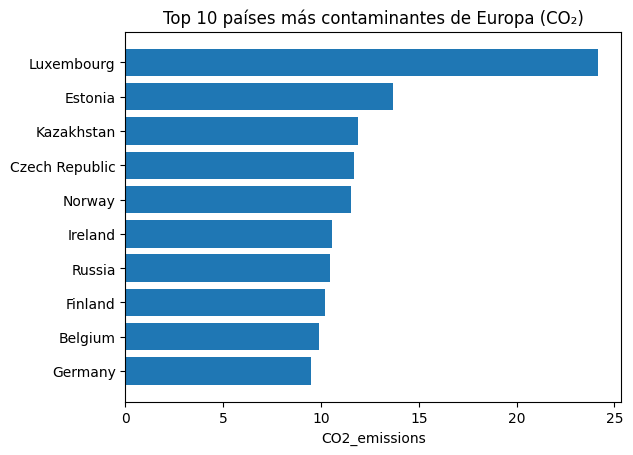

In [41]:
# H. Representa gráficamente los valores de los 10 paises más contaminantes de Europa usando el fichero 'WHO.csv' y la colummna "CO2_emissions". ** 1 punto **
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/User/Desktop/MAD2/ttda/WHO.csv")

eu = df[df["Continent"] == 2]
top10 = eu.nlargest(10, "CO2_emissions").sort_values("CO2_emissions")


plt.barh(top10["Country"], top10["CO2_emissions"])
plt.title("Top 10 países más contaminantes de Europa (CO₂)")
plt.xlabel("CO2_emissions")
plt.ylabel("")


In [42]:
# I. Representa gráficamente, usando el fichero 'WHO.csv', las diferencias entre tres continentes de tu elección de las columnas 'CO2_emissions', 'Agriculture_contribution_to_economy' y 'Number of physicians'.  ** 1 punto **


## Pregunta J. ** 2 puntos**

In [49]:
# Representa gráficamente la densidad diaria de ocupación del hotel con los datos disponibles en el fichero "data/hotel_reservations.csv"
# El hotel dispone de 150 habitaciones; ¿habrá días que se sobrepase el 100% de ocupación? 